# Discrete Hopfield Network（离散Hopfield网络）

In [1]:
import numpy as np
from neupy import algorithms

/dl_data/zhouyang/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def draw_bin_image(image_matrix):
    for row in image_matrix.tolist():
        print('| ' + ' '.join(' *'[val] for val in row))

In [150]:
def add_noise(x,threshold):
    if len(x.shape) >2:
        for i in range(x.shape[1]):
            random_c = np.random.randint(0,1000)
            if random_c < threshold*1000:
                x[0,i] = 1-x[0,i]
    else:
        for i in range(len(x)):
            random_c = np.random.randint(0,1000)
            if random_c < threshold*1000:
                x[i] = 1-x[i]
    return x

In [136]:
zero = np.matrix([
    0, 1, 1, 1, 0,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    0, 1, 1, 1, 0
])
one = np.matrix([
    0, 1, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 0, 0,
    0, 0, 1, 0, 0
])
two = np.matrix([
    1, 1, 1, 0, 0,
    0, 0, 0, 1, 0,
    0, 0, 0, 1, 0,
    0, 1, 1, 0, 0,
    1, 0, 0, 0, 0,
    1, 1, 1, 1, 1,
])

In [4]:
draw_bin_image(zero.reshape((6, 5)))

|   * * *  
| *       *
| *       *
| *       *
| *       *
|   * * *  


## Hopfield 训练与使用
* 训练：即简单拟合
* 使用：噪声数据输入 激活对应部分 输出

In [15]:
data = np.concatenate([zero, one, two], axis=0)
dhnet = algorithms.DiscreteHopfieldNetwork(mode='sync')
dhnet.train(data)

In [7]:
half_zero = np.matrix([
    0, 1, 1, 1, 0,
    1, 0, 0, 0, 1,
    1, 0, 0, 0, 1,
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
])
draw_bin_image(half_zero.reshape((6, 5)))


|   * * *  
| *       *
| *       *
|          
|          
|          


In [8]:
half_two = np.matrix([
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    0, 1, 1, 0, 0,
    1, 0, 0, 0, 0,
    1, 1, 1, 1, 1,
])
draw_bin_image(half_two.reshape((6, 5)))

|          
|          
|          
|   * *    
| *        
| * * * * *


In [10]:
result = dhnet.predict(half_zero)
draw_bin_image(result.reshape((6, 5)))

|   * * *  
| *       *
| *       *
| *       *
| *       *
|   * * *  


In [11]:
result = dhnet.predict(half_two)
draw_bin_image(result.reshape((6, 5)))

| * * *    
|       *  
|       *  
|   * *    
| *        
| * * * * *


In [12]:
half_two = np.matrix([
    1, 1, 1, 0, 0,
    0, 0, 0, 1, 0,
    0, 0, 0, 1, 0,
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
    0, 0, 0, 0, 0,
])

result = dhnet.predict(half_two)
draw_bin_image(result.reshape((6, 5)))

|   * *    
|     *    
|     *    
|   * *    
| *   *    
| * * * * *


In [116]:
noise_two = add_noise(two,0.2)
draw_bin_image(noise_two.reshape(6,5))

| *   *   *
|   * *    
| *   * *  
|       *  
|   * *    
| *   * *  


In [117]:
result = dhnet.predict(half_two)
draw_bin_image(result.reshape((6, 5)))

|   * *    
|     *    
|     *    
|   * *    
| *   *    
| * * * * *


## Hopfield 实现

In [137]:

class HOP(object):
    def __init__(self, N):

        self.N = N
        # Weight Matrix
        self.W = np.zeros((N, N), dtype = floatType)


    def kroneckerSquareProduct(self, factor):
        ksProduct = np.zeros((self.N, self.N), dtype = floatType)

 
        for i in range(0, self.N):
            ksProduct[i] = factor[i] * factor

        return ksProduct


    def trainOnce(self, inputArray):

        mean = float(inputArray.sum()) / inputArray.shape[0]
        self.W = self.W + self.kroneckerSquareProduct(inputArray - mean) / (self.N * self.N) / mean / (1 - mean)


        index = range(0, self.N)
        self.W[index, index] = 0.

    def hopTrain(self, stableStateList):

        stableState = np.asarray(stableStateList, dtype = uintType)


        if np.amin(stableState) < 0 or np.amax(stableState) > 1:
            print ('Vector Range ERROR!')
            return

        print(stableState.shape,"shape")
        if len(stableState.shape) == 1 and stableState.shape[0] == self.N:
            print ('stableState count: 1')
            self.trainOnce(stableState)
        elif len(stableState.shape) == 2 and stableState.shape[1] == self.N:
            print ('stableState count: ' + str(stableState.shape[0])) 
            for i in range(0, stableState.shape[0]):
                self.trainOnce(stableState[i])
        else:
            print ('SS Dimension ERROR! Training Aborted.')
            return
        print ('Hopfield Training Complete.')

    def hopRun(self, inputList):

        inputArray = np.asarray(inputList, dtype = floatType)
        inputArray = inputArray.squeeze()

        if len(inputArray.shape) != 1 or inputArray.shape[0] != self.N:
            print ('Input Dimension ERROR! Runing Aborted.')
            return


        matrix = np.tile(inputArray, (self.N, 1))
        matrix = self.W * matrix
        ouputArray = matrix.sum(1)

        m = float(np.amin(ouputArray))
        M = float(np.amax(ouputArray))
        ouputArray = (ouputArray - m) / (M - m)


        ouputArray[ouputArray < 0.5] = 0.
        ouputArray[ouputArray > 0] = 1.

        return np.asarray(ouputArray, dtype = uintType)


    def hopReset(self):

        self.W = np.zeros((self.N, self.N), dtype = floatType)

In [138]:
uintType = np.uint8
floatType = np.float32
hop = HOP(5 * 6)

In [139]:
hop.hopTrain([zero, one, two])

(3, 30) shape
stableState count: 3
Hopfield Training Complete.


In [140]:
draw_bin_image(half_two.reshape((6, 5)))

| * * *    
|       *  
|       *  
|          
|          
|          


In [141]:
result = hop.hopRun(half_two)
draw_bin_image(result.reshape((6, 5)))

| * * *    
|       *  
|       *  
|   * *    
| *        
| * * * * *


In [142]:
noise_two = add_noise(two,0.2)
draw_bin_image(noise_two.reshape(6,5))

| * * *    
|       *  
| *   *    
|   * * *  
| *        
|   *   * *


In [143]:
result = hop.hopRun(noise_two)
draw_bin_image(result.reshape((6, 5)))

| * * *    
|       *  
|       *  
|   * *    
| *        
| * * * * *


In [144]:
noise_zero = add_noise(zero,0.2)
draw_bin_image(noise_zero.reshape(6,5))

| *   * *  
| *   *   *
| *   *   *
| *       *
| *   *   *
|   * *    


In [146]:
result = hop.hopRun(noise_zero)
draw_bin_image(result.reshape((6, 5)))

|   * * *  
| *       *
| *       *
| *       *
| *       *
|   * * *  


## Mnist 手写数字

In [156]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot as plt
# 获取数据
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


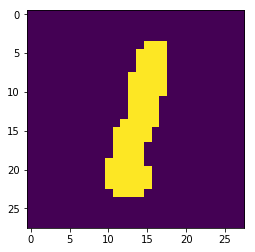

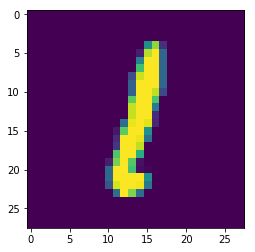

|                                                        
|                                                        
|                                                        
|                                                        
|                                                        
|                     * * * * * * * * * *                
|                   * * * * * * * * * * * *              
|                   * * * * *   * * * * * * *            
|                 * * * * *         * * * * *            
|                 * * * * *           * * * *            
|                 * * * *             * * * * *          
|               * * * *                 * * * *          
|               * * * *                 * * * *          
|               * * * *                 * * * *          
|               * * * *                 * * * *          
|               * * * *                 * * * *          
|               * * * *                 * * * *          
|             

In [160]:
eight = mnist.train.images[5]>0
one = mnist.train.images[6]>0
nine = mnist.train.images[8]>0
zero = mnist.train.images[10]>0
plt.imshow(one.reshape(28,28))
plt.show()
plt.imshow(mnist.train.images[6].reshape(28,28))
plt.show()
draw_bin_image(zero.reshape(28,28)>0)

In [148]:
hop = HOP(28 * 28)
hop.hopTrain([one, nine, zero,eight])

(4, 784) shape
stableState count: 4
Hopfield Training Complete.


In [151]:
noise_zero = add_noise(zero,0.2)
draw_bin_image(noise_zero.reshape(28,28))

|                             *     *     *              
|                 *   *       *           * *         *  
|       *               * *       *     *       *        
| *   *       *                           * *     *   *  
|       *                               *       *   *    
| *     *     *         * * *   * *   * *     * *        
|   * *           * * * * * * *       * *       * *      
|     * *           *   * * * * * * * * * * *            
| * *   * *         * * * * *       * * * * *            
|                 * * * * *           * * *             *
|   *           * * * * *   *     *   * * * * *       *  
| *     *   * * * * * *   *             *       *        
|       * *   * * * * *   * * * *   *   *   *     * * *  
|           * *   * *     *             * *   *          
|               * * * *       * *         *   *          
|     *         * * * *         *       * *              
| *   *   * * * * * * *   *   * *         * * * *       *
|   * *       

In [153]:
result = hop.hopRun(noise_zero)
draw_bin_image(result.reshape((28, 28)))

|                                                        
|                                                        
|                                                        
|                                                        
|                                                        
|                     * * * * * * * * * *                
|                   * * * * * * * * * * * *              
|                   * * * * *   * * * * * * *            
|                 * * * * *         * * * * *            
|                 * * * * *           * * * *            
|                 * * * *             * * * * *          
|               * * * *                 * * * *          
|               * * * *                 * * * *          
|               * * * *                 * * * *          
|               * * * *                 * * * *          
|               * * * *                 * * * *          
|               * * * *                 * * * *          
|             

In [154]:
noise_eight = add_noise(eight,0.2)
draw_bin_image(noise_eight.reshape(28,28))

|         *   *   *   *           *               * *    
|                       *       *                        
|     *       *   *   *       *                         *
|             *   *                   *     * * *        
| *       *   *         *     *   *                      
|   *       *                   * *   * *   * *          
|     *         *           * * * * * *   * * * *        
|           *     *         * * * * * * * * *   *   * *  
| *               *   * * * *   * * * * * *   * *        
| *               *     * * * * *         * * *          
|       *               *   * *         *   *       *   *
| * *               *       * *   * * * * * *            
|   * *         *       * * *       * *     *            
|             *     *   * * *   * * * * * *   *     *    
|     *       *     * * * * * * * *   *                  
|   * * *   *         * *   * * *   *                    
|             *     * * *   * * * * * *   *              
|             

In [155]:
result = hop.hopRun(noise_eight)
draw_bin_image(result.reshape((28, 28)))

|                                                        
|                                                        
|                                                        
|                                                        
|                                                        
|                               * * * * *                
|                           * * * * * * * *              
|                           * * * * * * * * *            
|                       * * * * * * * * * * *            
|                       * * * * *         * *            
|                       *   * *       * * * *            
|                           *     * * * * * *            
|                           *     * * * * * *            
|                           * * * * * * * *              
|                       * * * * * * * *                  
|                     * * * * * * * *                    
|                 * * * * * * * *   * *                  
|             

### 使用mnist 相同数字但是不同图像作为“噪声”输入

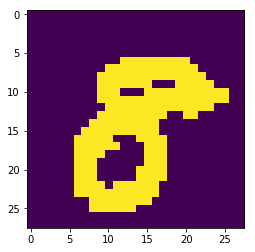

|                                                        
|                                                        
|                                                        
|                                                        
|                                                        
|                                                        
|                         * * * * * * * * *              
|                     * * * * * * * * * * * *            
|                   * * * * * * * * * * * * * *          
|                   * * * * * * *       * * * * *        
|                   * * *       * * * * * * * * * * *    
|                   * * * * * * * * * * * * * * * * *    
|                     * * * * * * * * * * * * * *        
|                   * * * * * * * * *     * *            
|                 * * * * * * * * *                      
|               * * * * * * * * * *                      
|             * * * * *       * * * *                    
|             

In [180]:
new_eight = mnist.train.images[29]>0
plt.imshow(new_eight.reshape(28,28))
plt.show()
draw_bin_image(new_eight.reshape((28, 28)))

In [181]:
result = hop.hopRun(new_eight)
draw_bin_image(result.reshape((28, 28)))

|                                                        
|                                                        
|                                                        
|                                                        
|                                                        
|                               * * * * *                
|                           * * * * * * * *              
|                           * * * * * * * * *            
|                       * * * * * * * * * * *            
|                       * * * * *         * *            
|                       *   * *       * * * *            
|                           *     * * * * * *            
|                           *     * * * * * *            
|                           * * * * * * * *              
|                       * * * * * * * *                  
|                     * * * * * * * *                    
|                 * * * * * * * *   * *                  
|             